In [11]:
#pip install descartes

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [14]:
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_deths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
url_countries = "https://raw.githubusercontent.com/AnthonyEbert/COVID-19_ISO-3166/master/JohnsHopkins-to-A3.csv"
data_confirmed = pd.read_csv(url_confirmed)
data_deths = pd.read_csv(url_deths)
data_recovered = pd.read_csv(url_recovered)
data_countries = pd.read_csv(url_countries)

days=data_confirmed.shape[1]-4

print("matrix shape:" ,data_confirmed.shape)
#data_confirmed[data_confirmed['Country/Region']=='China']
#print(data_confirmed.iloc[:,0:2].values)
data_confirmed.head(5)

matrix shape: (273, 387)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086


total confirmed:  3395.981 k
total deths:  79.111 k
total recovered:  239.183 k


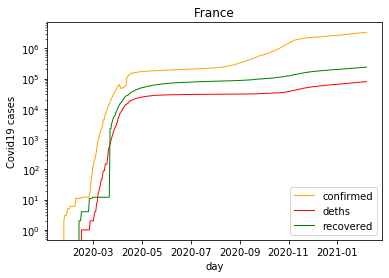

In [21]:
country='France'

confirmedC = data_confirmed.groupby("Country/Region").sum().drop(['Lat','Long'], axis=1).loc[country]
dethsC = data_deths.groupby("Country/Region").sum().drop(['Lat','Long'], axis=1).loc[country]
recoveredC = data_recovered.groupby("Country/Region").sum().drop(['Lat','Long'], axis=1).loc[country]

df=pd.DataFrame({'x':pd.date_range("01/22/20",periods=days),'yy1':confirmedC.values,'yy2':dethsC.values,'yy3':recoveredC.values})
# multiple line plot
plt.plot( 'x', 'yy1', data=df, marker='', color='orange', linewidth=1,label="confirmed")
plt.plot( 'x', 'yy2', data=df, marker='', color='red', linewidth=1,label="deths")
plt.plot( 'x', 'yy3', data=df, marker='', color='green', linewidth=1,label="recovered")
plt.legend()
plt.yscale("log")
plt.xlabel('day')
plt.ylabel('Covid19 cases')
plt.title(country)

print("total confirmed: ", confirmedC.iloc[days-1]/1000,'k')
print("total deths: ", dethsC.iloc[days-1]/1000,'k')
print("total recovered: ", recoveredC.iloc[days-1]/1000,'k')

,Country/Region,alpha3,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


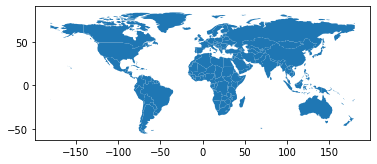

In [16]:
shapefile = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
map_world = gpd.read_file(shapefile)[['ADMIN','ADM0_A3','geometry']]
#Rename columns.
map_world.columns = ['Country/Region','alpha3','geometry']
#gdf.head(5)

#print(map_world[map_world['ADMIN'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
map_world0 = map_world.drop(map_world.index[159])
map_world0.plot()
map_world.head(5)

In [17]:
confirmedT=data_confirmed.groupby('Country/Region').sum().drop(['Lat','Long'], axis=1)
confirmedToday=confirmedT.iloc[:,days-1].reset_index()
confirmedToday.columns = ['Country/Region','today']
confirmedToday0=(confirmedToday.set_index('Country/Region')).join(data_countries.set_index('Country/Region'))
print(confirmedToday0.head(5))

                 today alpha3
Country/Region               
Afghanistan      55335    AFG
Albania          85336    ALB
Algeria         109088    DZA
Andorra          10251    AND
Angola           20086    AGO


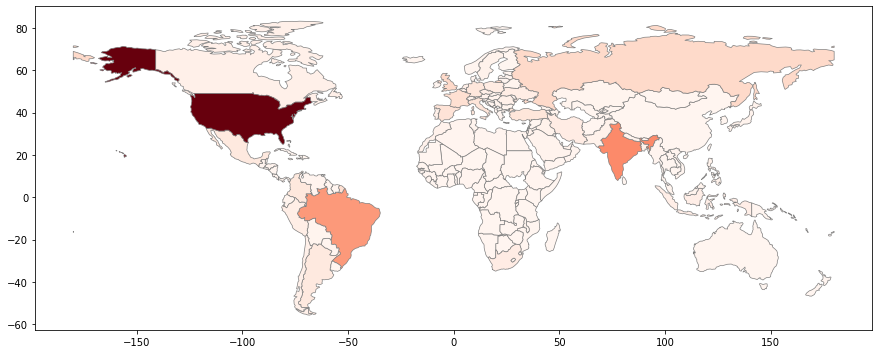

In [28]:
#Merge dataframes gdf and confirmedT.
merged = (map_world.set_index('alpha3')).join(confirmedToday0.set_index('alpha3'))
merged.head()

# set a variable that will call whatever column we want to visualise on the map
variable = 'today'
# set the range for the choropleth
vmin, vmax = 100, 250
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 15))

merged.plot(column=variable, cmap='Reds', linewidth=0.7, ax=ax, edgecolor='0.5')